In [1]:
import pandas as pd
import glob
import numpy as np
import json
import ast
import os
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import sys
sys.path.append('..')
from src.models.pipeline import pipeline
import warnings
warnings.filterwarnings("ignore")
from src.models.train_model import functionsBuilder

# Getting transcripts

In [2]:
groundbase_dir = '../data/raw/groundbase'
transcripts_dir = os.path.join(groundbase_dir,'transcripts')
topic_dataset_path = os.path.join(groundbase_dir,'dataset.csv')
results_csv = '../data/processed/bayesian_opt/phrases/lemmas_adv_propn.csv'

videos_ids = ['NuY7szYSXSw','XX7ePR21Ook','h9wxtqoa1jY','GJpt_3ie4WU','bTyxpoi2dmM']#['zWg7U0OEAoE','7kLHJ-F33GI','7snJ1mx1EMQ','RIawrYLVdIw','tORLeHHtazM']
transcript_filespath = [glob.glob(groundbase_dir + '/transcripts/{}.json'.format(vid))[0]
                                  for vid in videos_ids]
transcript_filespath

'''Read the transcript'''
transcripts_jsons = {}
for fl in transcript_filespath:
    with open(fl,encoding="utf8") as f:
        transcript =ast.literal_eval(f.read()) #json.load(f)
        vid = fl.split('/')[-1].split('.')[0]
        #print(vid)
        transcripts_jsons[vid] = transcript
#print(transcripts_jsons)

'''Read the videos metadata to perform on them the segmentation'''
df_videos = pd.read_csv(topic_dataset_path)

''' Transfer topic shifts time to seconds units instead HH:MM:SS'''

def topic_shifts_seconds(topic_shifts):
    tp_shift_sec=[]
    for tp in topic_shifts:
        intervals = tp.split(':')
        seconds = int(intervals[2])
        minutes = int(intervals[1]) * 60
        hours = int(intervals[0]) * 60 *60
        tp_shift_sec.append(seconds + minutes + hours)
    return tp_shift_sec


for video_id in transcripts_jsons.keys():    
    df_videos.at[df_videos['video id'] == video_id,'topic shifts(ends)'] =\
    topic_shifts_seconds(\
                         df_videos[df_videos['video id'] == \
                                   video_id]['topic shifts(ends)'])

# Get Recorded results

In [3]:
experiments_path = '../data/processed/bayesian_opt'
csv_files = glob.glob(experiments_path + '/**/*.csv',recursive=True)

In [4]:
dfs = [pd.read_csv(csv) for csv in csv_files]

In [5]:
all_dfs = pd.read_csv('../data/processed/bayesian_opt/phrases/lemmas_adv_propn.csv')

In [6]:
all_dfs 

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1,video,max_target,workflow,params,param_bounds
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,zWg7U0OEAoE,0.384615,sliding_window-tfidf-cosine-None-spectral_clus...,"{'n_clusters': 14.502132028215444, 'sim_thresh...","{'window_size': (20, 150), 'step_size': (10, 6..."
1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,zWg7U0OEAoE,0.230769,sliding_window-tfidf-cosine-None-spectral_clus...,"{'n_clusters': 12.880535344902679, 'sim_thresh...","{'window_size': (20, 150), 'step_size': (10, 6..."
2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,zWg7U0OEAoE,0.384615,sliding_window-tfidf-cosine-None-spectral_clus...,"{'n_clusters': 18.0, 'sim_thresh': 0.6, 'step_...","{'window_size': (20, 150), 'step_size': (10, 6..."
3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,zWg7U0OEAoE,0.000000,sliding_window-tfidf-cosine-None-spectral_clus...,"{'n_clusters': 18.0, 'sim_thresh': 0.6, 'step_...","{'window_size': (20, 150), 'step_size': (10, 6..."
4,4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,zWg7U0OEAoE,0.230769,sliding_window-tfidf-cosine-None-spectral_clus...,"{'n_clusters': 15.740314117671524, 'sim_thresh...","{'window_size': (20, 150), 'step_size': (10, 6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029,2029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bTyxpoi2dmM,0.000000,"sliding_window-tfidf-cosine-median_(3,3)-spect...","{'n_clusters': 28.0, 'sim_thresh': 0.3, 'step_...","{'window_size': (120, 170), 'step_size': (10, ..."
2030,2030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bTyxpoi2dmM,0.250000,"sliding_window-tfidf-cosine-median_(3,3)-spect...","{'n_clusters': 28.0, 'sim_thresh': 0.6, 'step_...","{'window_size': (120, 170), 'step_size': (10, ..."
2031,2031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bTyxpoi2dmM,0.000000,"sliding_window-tfidf-cosine-median_(3,3)-spect...","{'n_clusters': 28.0, 'sim_thresh': 0.3, 'step_...","{'window_size': (120, 170), 'step_size': (10, ..."
2032,2032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bTyxpoi2dmM,0.750000,"sliding_window-tfidf-cosine-median_(3,3)-spect...","{'n_clusters': 28.0, 'sim_thresh': 0.6, 'step_...","{'window_size': (120, 170), 'step_size': (10, ..."


In [7]:
vids = ['NuY7szYSXSw','XX7ePR21Ook','h9wxtqoa1jY','GJpt_3ie4WU','bTyxpoi2dmM']
pd.set_option('display.max_colwidth', 200)
all_dfs = all_dfs.loc[:, ~all_dfs.columns.str.contains('^Unnamed')].loc[all_dfs['video'].isin(vids),['max_target','video','params','param_bounds','workflow']].sort_values(by=['max_target','video'],ascending=False)


In [8]:
all_dfs

,max_target,video,params,param_bounds,workflow
1958,1.000,GJpt_3ie4WU,"{'n_clusters': 28.0, 'sim_thresh': 0.6, 'step_size': 30.0, 'window_size': 120.0}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (23, 28)}","sliding_window-tfidf-cosine-median_(2,2)-spectral_clustering"
1992,0.875,bTyxpoi2dmM,"{'n_clusters': 28.0, 'sim_thresh': 0.3, 'step_size': 10.0, 'window_size': 123.99641712956425}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (23, 28)}",sliding_window-tfidf-cosine-None-spectral_clustering
1776,0.875,NuY7szYSXSw,"{'n_clusters': 28.0, 'sim_thresh': 0.6, 'step_size': 10.0, 'window_size': 120.0}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (23, 28)}",sliding_window-tfidf-cosine-None-spectral_clustering
1781,0.875,NuY7szYSXSw,"{'n_clusters': 28.0, 'sim_thresh': 0.6, 'step_size': 30.0, 'window_size': 161.8718552073135}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (23, 28)}",sliding_window-tfidf-cosine-None-spectral_clustering
1652,0.800,h9wxtqoa1jY,"{'n_clusters': 24.78778213198992, 'sim_thresh': 0.5649374271390109, 'step_size': 12.76021134713519, 'window_size': 133.19276877454558}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (20, 25)}","sliding_window-tfidf-cosine-median_(3,3)-spectral_clustering"
...,...,...,...,...,...
1973,0.000,GJpt_3ie4WU,"{'n_clusters': 24.98383737115335, 'sim_thresh': 0.46164502020100706, 'step_size': 18.383890288065896, 'window_size': 154.26097501983799}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (23, 28)}","sliding_window-tfidf-cosine-median_(3,3)-spectral_clustering"
1976,0.000,GJpt_3ie4WU,"{'n_clusters': 28.0, 'sim_thresh': 0.3, 'step_size': 30.0, 'window_size': 170.0}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (23, 28)}","sliding_window-tfidf-cosine-median_(3,3)-spectral_clustering"
1977,0.000,GJpt_3ie4WU,"{'n_clusters': 28.0, 'sim_thresh': 0.3, 'step_size': 21.672414682736378, 'window_size': 125.89163526724451}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (23, 28)}","sliding_window-tfidf-cosine-median_(3,3)-spectral_clustering"
1978,0.000,GJpt_3ie4WU,"{'n_clusters': 28.0, 'sim_thresh': 0.3, 'step_size': 10.0, 'window_size': 145.8588063536026}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (23, 28)}","sliding_window-tfidf-cosine-median_(3,3)-spectral_clustering"


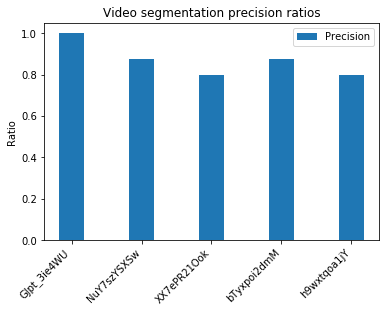

In [9]:
'''Best results for the videos'''
grp = all_dfs.groupby('video')
maxes = grp['max_target'].max()
videos = grp.groups.keys()

fig,ax =  plt.subplots()
ax.bar(videos,maxes,0.35,label='Precision')
ax.set_ylabel('Ratio')
ax.set_title('Video segmentation precision ratios')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend()
plt.show()

In [10]:
n_head = 3
workflow_ = 'sliding_window-tfidf-cosine-median_(2,2)-spectral_clustering'
display(all_dfs[(all_dfs['video'] == 'GJpt_3ie4WU') & (all_dfs['workflow'] == workflow_)].head(n_head))
display(all_dfs[(all_dfs['video'] == 'NuY7szYSXSw')  & (all_dfs['workflow'] == workflow_)].head(n_head))
display(all_dfs[(all_dfs['video'] == 'bTyxpoi2dmM')  & (all_dfs['workflow'] == workflow_)].head(n_head))
display(all_dfs[(all_dfs['video'] == 'XX7ePR21Ook')  & (all_dfs['workflow'] == workflow_)].head(n_head))
display(all_dfs[(all_dfs['video'] == 'h9wxtqoa1jY')  & (all_dfs['workflow'] == workflow_)].head(n_head))

,max_target,video,params,param_bounds,workflow
1958,1.000000,GJpt_3ie4WU,"{'n_clusters': 28.0, 'sim_thresh': 0.6, 'step_size': 30.0, 'window_size': 120.0}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (23, 28)}","sliding_window-tfidf-cosine-median_(2,2)-spectral_clustering"
1689,0.714286,GJpt_3ie4WU,"{'n_clusters': 25.0, 'sim_thresh': 0.6, 'step_size': 30.0, 'window_size': 120.0}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (20, 25)}","sliding_window-tfidf-cosine-median_(2,2)-spectral_clustering"
1959,0.714286,GJpt_3ie4WU,"{'n_clusters': 28.0, 'sim_thresh': 0.6, 'step_size': 22.669080214324392, 'window_size': 120.0}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (23, 28)}","sliding_window-tfidf-cosine-median_(2,2)-spectral_clustering"


,max_target,video,params,param_bounds,workflow
1524,0.625,NuY7szYSXSw,"{'n_clusters': 25.0, 'sim_thresh': 0.6, 'step_size': 17.91985380327315, 'window_size': 120.0}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (20, 25)}","sliding_window-tfidf-cosine-median_(2,2)-spectral_clustering"
1791,0.625,NuY7szYSXSw,"{'n_clusters': 25.08511002351287, 'sim_thresh': 0.5160973480326474, 'step_size': 10.002287496346899, 'window_size': 135.116628631592}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (23, 28)}","sliding_window-tfidf-cosine-median_(2,2)-spectral_clustering"
993,0.500,NuY7szYSXSw,"{'n_clusters': 11.786160659898577, 'sim_thresh': 0.5924873369457966, 'step_size': 10.02958342234513, 'window_size': 115.54702330980619}","{'window_size': (100, 150), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (9, 15)}","sliding_window-tfidf-cosine-median_(2,2)-spectral_clustering"


,max_target,video,params,param_bounds,workflow
2014,0.750,bTyxpoi2dmM,"{'n_clusters': 28.0, 'sim_thresh': 0.6, 'step_size': 10.0, 'window_size': 123.34157224981936}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (23, 28)}","sliding_window-tfidf-cosine-median_(2,2)-spectral_clustering"
1737,0.625,bTyxpoi2dmM,"{'n_clusters': 22.08511002351287, 'sim_thresh': 0.5160973480326474, 'step_size': 10.002287496346899, 'window_size': 135.116628631592}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (20, 25)}","sliding_window-tfidf-cosine-median_(2,2)-spectral_clustering"
1742,0.625,bTyxpoi2dmM,"{'n_clusters': 25.0, 'sim_thresh': 0.6, 'step_size': 30.0, 'window_size': 170.0}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (20, 25)}","sliding_window-tfidf-cosine-median_(2,2)-spectral_clustering"


,max_target,video,params,param_bounds,workflow
1851,0.8,XX7ePR21Ook,"{'n_clusters': 28.0, 'sim_thresh': 0.6, 'step_size': 10.0, 'window_size': 158.45374809339853}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (23, 28)}","sliding_window-tfidf-cosine-median_(2,2)-spectral_clustering"
1845,0.7,XX7ePR21Ook,"{'n_clusters': 25.08511002351287, 'sim_thresh': 0.5160973480326474, 'step_size': 10.002287496346899, 'window_size': 135.116628631592}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (23, 28)}","sliding_window-tfidf-cosine-median_(2,2)-spectral_clustering"
1017,0.6,XX7ePR21Ook,"{'n_clusters': 11.502132028215444, 'sim_thresh': 0.5160973480326474, 'step_size': 10.002287496346899, 'window_size': 115.116628631592}","{'window_size': (100, 150), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (9, 15)}","sliding_window-tfidf-cosine-median_(2,2)-spectral_clustering"


,max_target,video,params,param_bounds,workflow
1903,0.8,h9wxtqoa1jY,"{'n_clusters': 23.707029645990197, 'sim_thresh': 0.6, 'step_size': 10.0, 'window_size': 131.94928073001992}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (23, 28)}","sliding_window-tfidf-cosine-median_(2,2)-spectral_clustering"
1905,0.8,h9wxtqoa1jY,"{'n_clusters': 23.641478128582737, 'sim_thresh': 0.5619462595629774, 'step_size': 10.012725671607443, 'window_size': 128.3533553675225}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (23, 28)}","sliding_window-tfidf-cosine-median_(2,2)-spectral_clustering"
1632,0.7,h9wxtqoa1jY,"{'n_clusters': 25.0, 'sim_thresh': 0.31099028749378627, 'step_size': 19.565577266647214, 'window_size': 155.62408810826076}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (20, 25)}","sliding_window-tfidf-cosine-median_(2,2)-spectral_clustering"


In [11]:
n_head = 3
workflow_ = 'sliding_window-tfidf-cosine-median_(3,3)-spectral_clustering'
display(all_dfs[(all_dfs['video'] == 'GJpt_3ie4WU') & (all_dfs['workflow'] == workflow_)].head(n_head))
display(all_dfs[(all_dfs['video'] == 'NuY7szYSXSw')  & (all_dfs['workflow'] == workflow_)].head(n_head))
display(all_dfs[(all_dfs['video'] == 'bTyxpoi2dmM')  & (all_dfs['workflow'] == workflow_)].head(n_head))
display(all_dfs[(all_dfs['video'] == 'XX7ePR21Ook')  & (all_dfs['workflow'] == workflow_)].head(n_head))
display(all_dfs[(all_dfs['video'] == 'h9wxtqoa1jY')  & (all_dfs['workflow'] == workflow_)].head(n_head))

,max_target,video,params,param_bounds,workflow
1462,0.571429,GJpt_3ie4WU,"{'n_clusters': 17.0, 'sim_thresh': 0.6, 'step_size': 30.0, 'window_size': 170.0}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (11, 17)}","sliding_window-tfidf-cosine-median_(3,3)-spectral_clustering"
1705,0.571429,GJpt_3ie4WU,"{'n_clusters': 25.0, 'sim_thresh': 0.6, 'step_size': 30.0, 'window_size': 170.0}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (20, 25)}","sliding_window-tfidf-cosine-median_(3,3)-spectral_clustering"
1707,0.571429,GJpt_3ie4WU,"{'n_clusters': 20.0, 'sim_thresh': 0.6, 'step_size': 30.0, 'window_size': 170.0}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (20, 25)}","sliding_window-tfidf-cosine-median_(3,3)-spectral_clustering"


,max_target,video,params,param_bounds,workflow
1543,0.625,NuY7szYSXSw,"{'n_clusters': 25.0, 'sim_thresh': 0.6, 'step_size': 10.0, 'window_size': 120.0}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (20, 25)}","sliding_window-tfidf-cosine-median_(3,3)-spectral_clustering"
1547,0.625,NuY7szYSXSw,"{'n_clusters': 25.0, 'sim_thresh': 0.6, 'step_size': 10.0, 'window_size': 126.90048254674257}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (20, 25)}","sliding_window-tfidf-cosine-median_(3,3)-spectral_clustering"
1816,0.625,NuY7szYSXSw,"{'n_clusters': 28.0, 'sim_thresh': 0.6, 'step_size': 30.0, 'window_size': 148.99165247589048}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (23, 28)}","sliding_window-tfidf-cosine-median_(3,3)-spectral_clustering"


,max_target,video,params,param_bounds,workflow
2032,0.750,bTyxpoi2dmM,"{'n_clusters': 28.0, 'sim_thresh': 0.6, 'step_size': 10.0, 'window_size': 146.4660366696624}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (23, 28)}","sliding_window-tfidf-cosine-median_(3,3)-spectral_clustering"
1246,0.625,bTyxpoi2dmM,"{'n_clusters': 17.0, 'sim_thresh': 0.6, 'step_size': 30.0, 'window_size': 100.0}","{'window_size': (100, 150), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (11, 17)}","sliding_window-tfidf-cosine-median_(3,3)-spectral_clustering"
1758,0.625,bTyxpoi2dmM,"{'n_clusters': 25.0, 'sim_thresh': 0.6, 'step_size': 10.0, 'window_size': 170.0}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (20, 25)}","sliding_window-tfidf-cosine-median_(3,3)-spectral_clustering"


,max_target,video,params,param_bounds,workflow
1863,0.8,XX7ePR21Ook,"{'n_clusters': 25.08511002351287, 'sim_thresh': 0.5160973480326474, 'step_size': 10.002287496346899, 'window_size': 135.116628631592}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (23, 28)}","sliding_window-tfidf-cosine-median_(3,3)-spectral_clustering"
1871,0.8,XX7ePR21Ook,"{'n_clusters': 28.0, 'sim_thresh': 0.6, 'step_size': 10.0, 'window_size': 146.2518935313457}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (23, 28)}","sliding_window-tfidf-cosine-median_(3,3)-spectral_clustering"
1595,0.7,XX7ePR21Ook,"{'n_clusters': 21.98383737115335, 'sim_thresh': 0.46164502020100706, 'step_size': 18.383890288065896, 'window_size': 154.26097501983799}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (20, 25)}","sliding_window-tfidf-cosine-median_(3,3)-spectral_clustering"


,max_target,video,params,param_bounds,workflow
1652,0.8,h9wxtqoa1jY,"{'n_clusters': 24.78778213198992, 'sim_thresh': 0.5649374271390109, 'step_size': 12.76021134713519, 'window_size': 133.19276877454558}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (20, 25)}","sliding_window-tfidf-cosine-median_(3,3)-spectral_clustering"
1650,0.7,h9wxtqoa1jY,"{'n_clusters': 23.23635442051126, 'sim_thresh': 0.5365407996910123, 'step_size': 10.12226136792707, 'window_size': 130.8454062295269}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (20, 25)}","sliding_window-tfidf-cosine-median_(3,3)-spectral_clustering"
1654,0.7,h9wxtqoa1jY,"{'n_clusters': 25.0, 'sim_thresh': 0.6, 'step_size': 18.695201897395442, 'window_size': 134.19664547780968}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (20, 25)}","sliding_window-tfidf-cosine-median_(3,3)-spectral_clustering"


In [12]:
n_head = 3
workflow_ = 'sliding_window-tfidf-cosine-None-spectral_clustering'
display(all_dfs[(all_dfs['video'] == 'GJpt_3ie4WU') & (all_dfs['workflow'] == workflow_)].head(n_head))
display(all_dfs[(all_dfs['video'] == 'NuY7szYSXSw')  & (all_dfs['workflow'] == workflow_)].head(n_head))
display(all_dfs[(all_dfs['video'] == 'bTyxpoi2dmM')  & (all_dfs['workflow'] == workflow_)].head(n_head))
display(all_dfs[(all_dfs['video'] == 'XX7ePR21Ook')  & (all_dfs['workflow'] == workflow_)].head(n_head))
display(all_dfs[(all_dfs['video'] == 'h9wxtqoa1jY')  & (all_dfs['workflow'] == workflow_)].head(n_head))

,max_target,video,params,param_bounds,workflow
1938,0.714286,GJpt_3ie4WU,"{'n_clusters': 28.0, 'sim_thresh': 0.6, 'step_size': 15.118069869611945, 'window_size': 120.49905827598639}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (23, 28)}",sliding_window-tfidf-cosine-None-spectral_clustering
1256,0.571429,GJpt_3ie4WU,"{'n_clusters': 17.0, 'sim_thresh': 0.6, 'step_size': 30.0, 'window_size': 100.0}","{'window_size': (100, 150), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (11, 17)}",sliding_window-tfidf-cosine-None-spectral_clustering
1283,0.571429,GJpt_3ie4WU,"{'n_clusters': 17.0, 'sim_thresh': 0.6, 'step_size': 30.0, 'window_size': 100.0}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (11, 17)}",sliding_window-tfidf-cosine-None-spectral_clustering


,max_target,video,params,param_bounds,workflow
1776,0.875,NuY7szYSXSw,"{'n_clusters': 28.0, 'sim_thresh': 0.6, 'step_size': 10.0, 'window_size': 120.0}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (23, 28)}",sliding_window-tfidf-cosine-None-spectral_clustering
1781,0.875,NuY7szYSXSw,"{'n_clusters': 28.0, 'sim_thresh': 0.6, 'step_size': 30.0, 'window_size': 161.8718552073135}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (23, 28)}",sliding_window-tfidf-cosine-None-spectral_clustering
1773,0.750,NuY7szYSXSw,"{'n_clusters': 25.08511002351287, 'sim_thresh': 0.5160973480326474, 'step_size': 10.002287496346899, 'window_size': 135.116628631592}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (23, 28)}",sliding_window-tfidf-cosine-None-spectral_clustering


,max_target,video,params,param_bounds,workflow
1992,0.875,bTyxpoi2dmM,"{'n_clusters': 28.0, 'sim_thresh': 0.3, 'step_size': 10.0, 'window_size': 123.99641712956425}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (23, 28)}",sliding_window-tfidf-cosine-None-spectral_clustering
1993,0.750,bTyxpoi2dmM,"{'n_clusters': 28.0, 'sim_thresh': 0.6, 'step_size': 30.0, 'window_size': 170.0}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (23, 28)}",sliding_window-tfidf-cosine-None-spectral_clustering
1996,0.750,bTyxpoi2dmM,"{'n_clusters': 28.0, 'sim_thresh': 0.6, 'step_size': 20.978756551652634, 'window_size': 120.0}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (23, 28)}",sliding_window-tfidf-cosine-None-spectral_clustering


,max_target,video,params,param_bounds,workflow
1834,0.8,XX7ePR21Ook,"{'n_clusters': 28.0, 'sim_thresh': 0.6, 'step_size': 10.0, 'window_size': 155.00978607188148}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (23, 28)}",sliding_window-tfidf-cosine-None-spectral_clustering
1564,0.7,XX7ePR21Ook,"{'n_clusters': 25.0, 'sim_thresh': 0.6, 'step_size': 21.39940555658473, 'window_size': 120.0}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (20, 25)}",sliding_window-tfidf-cosine-None-spectral_clustering
1016,0.6,XX7ePR21Ook,"{'n_clusters': 10.514164659326482, 'sim_thresh': 0.446109273513669, 'step_size': 21.79107831581505, 'window_size': 133.87421685152762}","{'window_size': (100, 150), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (9, 15)}",sliding_window-tfidf-cosine-None-spectral_clustering


,max_target,video,params,param_bounds,workflow
1883,0.7,h9wxtqoa1jY,"{'n_clusters': 24.98383737115335, 'sim_thresh': 0.46164502020100706, 'step_size': 18.383890288065896, 'window_size': 154.26097501983799}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (23, 28)}",sliding_window-tfidf-cosine-None-spectral_clustering
1885,0.7,h9wxtqoa1jY,"{'n_clusters': 28.0, 'sim_thresh': 0.4298415563526591, 'step_size': 15.921671762245136, 'window_size': 152.19618766955983}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (23, 28)}",sliding_window-tfidf-cosine-None-spectral_clustering
1887,0.7,h9wxtqoa1jY,"{'n_clusters': 28.0, 'sim_thresh': 0.6, 'step_size': 19.39659545110572, 'window_size': 157.32627576770105}","{'window_size': (120, 170), 'step_size': (10, 30), 'sim_thresh': (0.3, 0.6), 'n_clusters': (23, 28)}",sliding_window-tfidf-cosine-None-spectral_clustering


In [13]:
#myrecords = pd.DataFrame(columns=['video',
#                                  'step_size','clustering_params','window_size','filter_params','workflow'])
myrecords = read_csv('../data/processed/all_videos_same_parameters.csv')

In [62]:
test_set = ['XX7ePR21Ook','bTyxpoi2dmM']


workflow = 'sliding_window-tfidf-cosine-median_(2,2)-spectral_clustering'
print(workflow)

filter_params = filter_params={'filter_type':'median',
                               'mask_shape':(2,2),
                               'sim_thresh':0.6,
                               'is_min_thresh':True}#sim_thresh = 0.6
clustering_params={'algorithm': 'spectral_clustering','n_clusters':30}

step_size = 15
window_size = 120

for vid in videos:
    groundbase = df_videos.loc[df_videos['video id'] == vid,'topic shifts(ends)'].values.tolist()[:-1]
    tr = transcripts_jsons[vid]
    retries_times = 8
    while retries_times > 0:
        precision = pipeline.run_for_baye(groundbase,tr,window_size=window_size,
                                          step_size_sd=step_size,clustering_params=clustering_params,
                                         filter_params=filter_params,accurrcy_shift=45)
        print("vid : %s precision : %s retries lefts: %s" %(vid,precision,retries_times) )
        myrecords = myrecords.append({
            'precision':precision,
            'video':vid,
            'step_size':step_size,
            'clustering_params':clustering_params,
            'window_size':window_size,
            'filter_params':filter_params,
            'workflow':workflow
        },ignore_index=True)
        retries_times-=1

sliding_window-tfidf-cosine-median_(2,2)-spectral_clustering
vid : GJpt_3ie4WU precision : 0.42857142857142855 retries lefts: 8
vid : GJpt_3ie4WU precision : 0.7142857142857143 retries lefts: 7
vid : GJpt_3ie4WU precision : 0.8571428571428571 retries lefts: 6
vid : GJpt_3ie4WU precision : 0.7142857142857143 retries lefts: 5
vid : GJpt_3ie4WU precision : 1.0 retries lefts: 4
vid : GJpt_3ie4WU precision : 0.7142857142857143 retries lefts: 3
vid : GJpt_3ie4WU precision : 0.42857142857142855 retries lefts: 2
vid : GJpt_3ie4WU precision : 0.8571428571428571 retries lefts: 1
vid : NuY7szYSXSw precision : 0.4444444444444444 retries lefts: 8
vid : NuY7szYSXSw precision : 0.5555555555555556 retries lefts: 7
vid : NuY7szYSXSw precision : 0.4444444444444444 retries lefts: 6
vid : NuY7szYSXSw precision : 0.3333333333333333 retries lefts: 5
vid : NuY7szYSXSw precision : 0.6666666666666666 retries lefts: 4
vid : NuY7szYSXSw precision : 0.5555555555555556 retries lefts: 3
vid : NuY7szYSXSw precision 

In [58]:
myrecords.to_csv('../data/processed/all_videos_same_parameters.csv')

In [59]:
myrecords.groupby(['step_size','window_size','video'])['precision'].max()

step_size  window_size  video      
10         120          GJpt_3ie4WU    0.857143
                        NuY7szYSXSw    0.555556
                        XX7ePR21Ook    0.700000
                        bTyxpoi2dmM    0.625000
                        h9wxtqoa1jY    0.700000
15         120          GJpt_3ie4WU    1.000000
                        NuY7szYSXSw    0.777778
                        XX7ePR21Ook    0.800000
                        bTyxpoi2dmM    0.875000
                        h9wxtqoa1jY    0.700000
           130          GJpt_3ie4WU    0.857143
                        NuY7szYSXSw    0.777778
                        XX7ePR21Ook    0.700000
                        bTyxpoi2dmM    0.500000
                        h9wxtqoa1jY    0.700000
20         120          GJpt_3ie4WU    0.857143
                        NuY7szYSXSw    0.777778
                        XX7ePR21Ook    0.600000
                        bTyxpoi2dmM    0.750000
                        h9wxtqoa1jY    0.700000
    